In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sql
from matplotlib import ticker

In [1]:
%load_ext sql
import pandas as pd

df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
# Supongamos que estas son las columnas numéricas en el CSV
nuevos_nombres = {
    "4046": "categoria_a",
    "4225": "categoria_b",
    "4770": "categoria_c"
}

# Renombrar en el df
df.rename(columns=nuevos_nombres, inplace=True)


In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,categoria_a,categoria_b,categoria_c,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns = [col.lower().replace('%', '').strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

In [5]:
df_snow = df.copy()
df

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
print(df_snow.columns.tolist())

['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region']


In [7]:
df_snow.type.unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
dim_type = df[['type']].drop_duplicates().reset_index(drop=True)

# Asignar el código deseado a cada tipo
mapeo_tipo = {
    'conventional': 'TYC',
    'organic': 'TYO'
}

# Crear la columna type_id con los valores mapeados
dim_type['type_id'] = dim_type['type'].map(mapeo_tipo)

dim_type

,type,type_id
0,conventional,TYC
1,organic,TYO


In [9]:
df_snow = df_snow.merge(dim_type, on='type', how='left')
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,type_id
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,TYC
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,TYC
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,TYC
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,TYC
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,TYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,TYO
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,TYO
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,TYO
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,TYO


In [10]:
df_snow = df_snow.drop(columns=['type'])
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,year,region,type_id
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,TYC
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,TYC
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,TYC
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,TYC
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,TYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,TYO
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,TYO
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,TYO
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,TYO


In [11]:
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,year,region,type_id
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,TYC
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,TYC
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,TYC
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,TYC
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,TYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,TYO
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,TYO
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,TYO
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,TYO


In [14]:
# Visualize missing values in the dataframe
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

NameError: name 'plt' is not defined

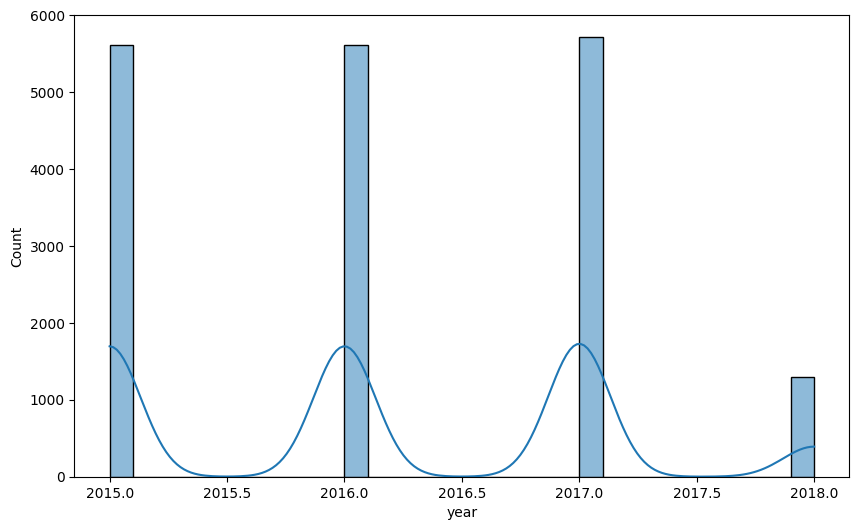

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['year'].dropna(), kde=True, bins=30)
plt.show()

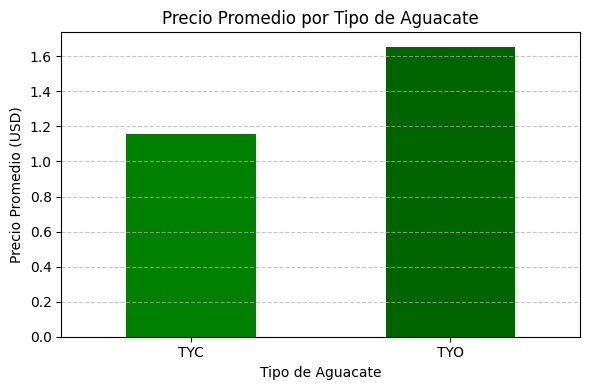

In [ ]:
precios_por_tipo = df_snow.groupby("type_id")["averageprice"].mean()

# Crear el diagrama de barras
plt.figure(figsize=(6, 4))
precios_por_tipo.plot(kind="bar", color=["green", "darkgreen"])
plt.title("Precio Promedio por Tipo de Aguacate")
plt.ylabel("Precio Promedio (USD)")
plt.xlabel("Tipo de Aguacate")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_90486/2484089343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='year', y='averageprice', palette='coolwarm')


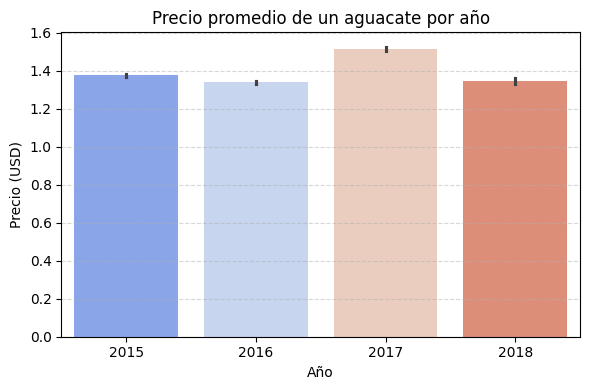

In [ ]:
# precio promedio por año 
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='year', y='averageprice', palette='coolwarm')

plt.title('Precio promedio de un aguacate por año')
plt.ylabel('Precio (USD)')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

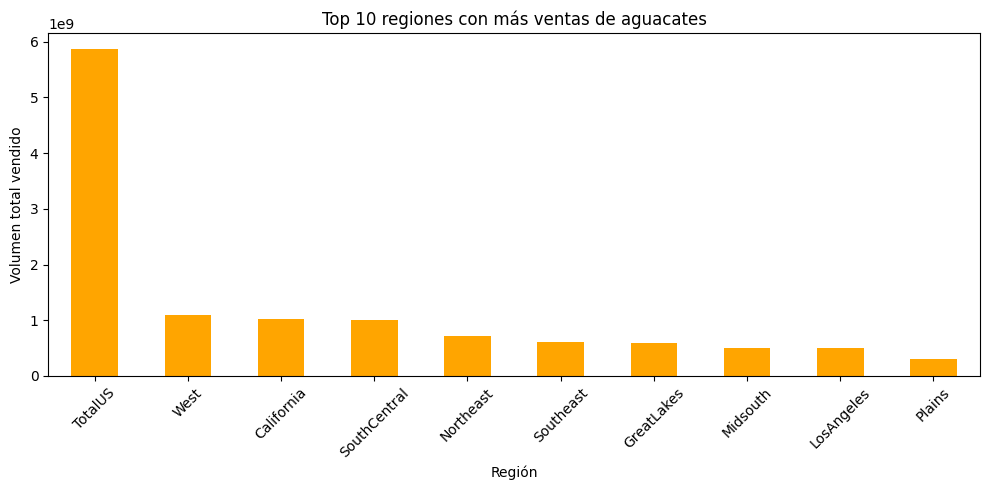

In [ ]:
# Agrupar por región y sumar el volumen
ventas_region = df.groupby('region')['total_volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
ventas_region.plot(kind='bar', color='orange')

plt.title('Top 10 regiones con más ventas de aguacates')
plt.ylabel('Volumen total vendido')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_90486/1327301682.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.set_index('date').resample('M')['total_volume'].sum()


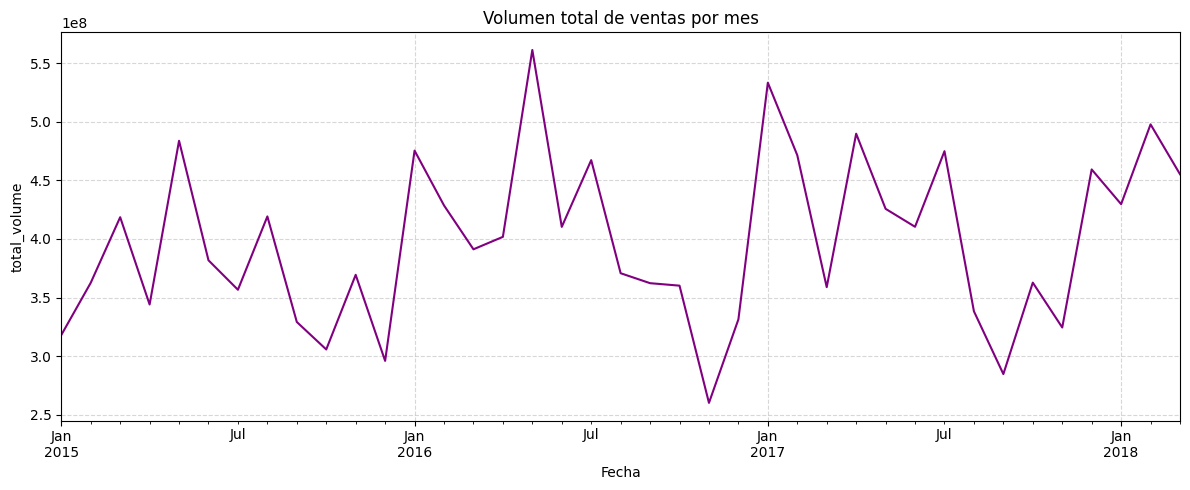

In [ ]:
# Asegúrate que la columna Date sea datetime
df['date'] = pd.to_datetime(df['date'])
df_mensual = df.set_index('date').resample('M')['total_volume'].sum()

plt.figure(figsize=(12,5))
df_mensual.plot(color='purple')

plt.title('Volumen total de ventas por mes')
plt.ylabel('total_volume')
plt.xlabel('Fecha')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


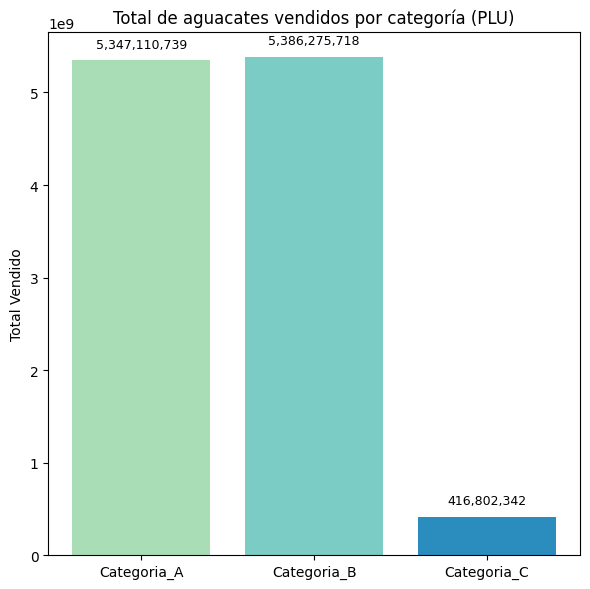

In [ ]:
df_plu = df[['categoria_a', 'categoria_b', 'categoria_c']].sum()
df_plu.index = ['Categoria_A', 'Categoria_B', 'Categoria_C']

plt.figure(figsize=(6,6))
bars = plt.bar(df_plu.index, df_plu.values, color=['#a8ddb5','#7bccc4','#2b8cbe'])

# Añadir valores numéricos sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e8, f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.title('Total de aguacates vendidos por categoría (PLU)')
plt.ylabel('Total Vendido')
plt.tight_layout()
plt.show()



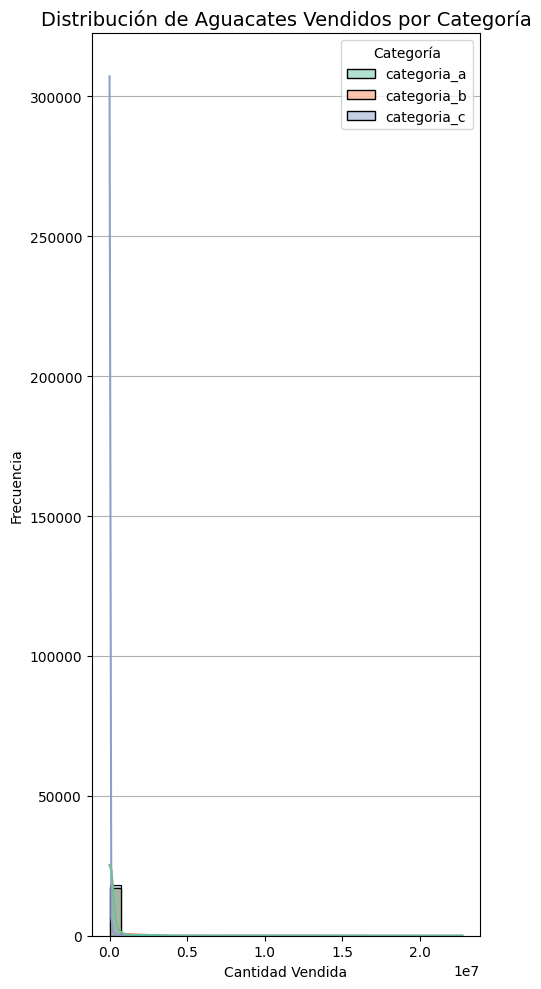

In [ ]:
# Primero organizamos los datos en formato largo (long format)
df_melt = df.melt(value_vars=['categoria_a', 'categoria_b', 'categoria_c'], 
                  var_name='Categoría', 
                  value_name='Cantidad Vendida')

# Creamos el histograma
plt.figure(figsize=(5,10))
sns.histplot(data=df_melt, x='Cantidad Vendida', hue='Categoría', bins=30, kde=True, palette='Set2')

# Títulos y etiquetas
plt.title("Distribución de Aguacates Vendidos por Categoría", fontsize=14)
plt.xlabel("Cantidad Vendida")
plt.ylabel("Frecuencia")
plt.grid(axis='y')

# Mostrar
plt.tight_layout()
plt.show()


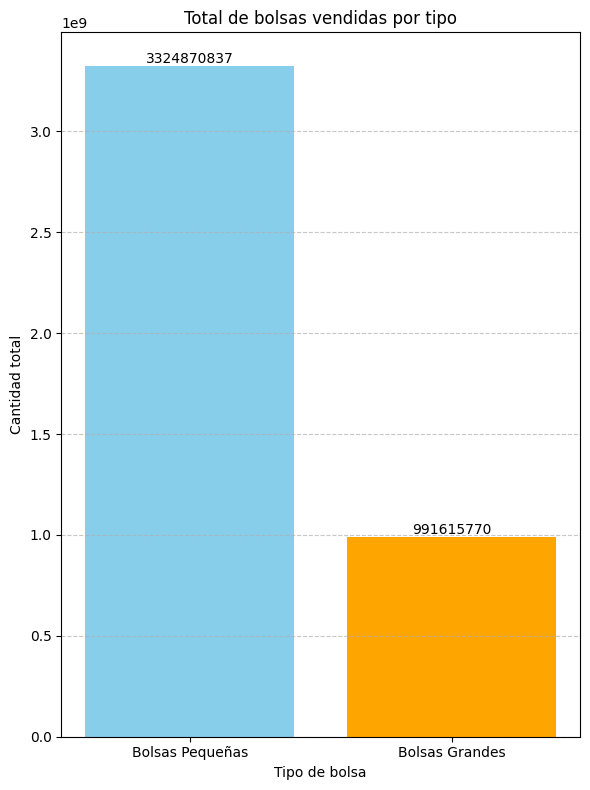

In [ ]:

# Sumar el total de bolsas pequeñas y grandes
total_small = df_snow["small_bags"].sum()
total_large = df_snow["large_bags"].sum()

# Crear un DataFrame con los totales
totales = pd.DataFrame({
    "tipo_bolsa": ["Bolsas Pequeñas", "Bolsas Grandes"],
    "cantidad": [total_small, total_large]
})

# Crear el gráfico de barras
plt.figure(figsize=(6, 8))
bars = plt.bar(totales["tipo_bolsa"], totales["cantidad"], color=["skyblue", "orange"])

# Añadir los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval)}', ha='center', va='bottom', fontsize=10)

# Añadir títulos y etiquetas
plt.title("Total de bolsas vendidas por tipo")
plt.xlabel("Tipo de bolsa")
plt.ylabel("Cantidad total")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()